In [4]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [61]:
# Read in data, convert date column to datetime format, set date column as index
data = Path("Data/2_deep_learning/combined_data_df.csv")
data_df = pd.read_csv(data)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.set_index('date')
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_low,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,427.0,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,428.2,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,425.0,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,427.1,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,446.8,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14


In [62]:
# Move BTC column to the end
df1 = data_df.pop('BTC') # remove column b and store it in df1
data_df['BTC']=df1 # add b series as a 'new' column.
data_df.head()

,DJIA,DIJA_open,DIJA_high,DIJA_Low,DIJA_vol,DIJA_pct_change,NASDAQ,NASDAQ_open,NASDAQ_high,NASDAQ_low,...,BTC_vol,BTC_pct_change,GDP,CPI,IPI,UNEMP,NFP,IUC,FED,BTC
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,17148.94,17405.48,17405.48,16957.63,148060000.0,-1.58,4903.09,4897.65,4903.09,4846.98,...,13020.0,0.99,18382.82,237.80,102.88,4.9,143195.45,276142.86,4486600.57,432.9
2016-01-05,17158.66,17147.50,17195.84,17038.61,105750000.0,0.06,4891.43,4917.84,4926.73,4872.74,...,11220.0,-0.24,18383.82,237.79,102.86,4.9,143203.94,277714.29,4486603.29,431.8
2016-01-06,16906.51,17154.83,17154.83,16817.62,120250000.0,-1.47,4835.77,4813.76,4866.04,4804.69,...,8740.0,-0.89,18384.82,237.78,102.83,4.9,143212.42,279285.71,4486606.00,428.0
2016-01-07,16514.10,16888.36,16888.36,16463.63,176240000.0,-2.32,4689.43,4736.40,4788.02,4688.17,...,55660.0,7.26,18385.83,237.77,102.81,4.9,143220.90,280857.14,4488761.57,459.0
2016-01-08,16346.45,16519.17,16651.89,16314.57,141850000.0,-1.02,4643.63,4722.02,4742.57,4637.85,...,30450.0,-1.10,18386.83,237.76,102.79,4.9,143229.39,282428.57,4490917.14,454.0


In [63]:
#Make a list of all of the columns in the dataframe and get the total number of columns
cols = list(data_df.columns.values)
len(cols)

63

In [64]:
# Create the features (X) and target (y) sets
X = data_df.iloc[:, 0:63].values
y = data_df["BTC"].values

In [65]:
# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [66]:
# Define the model - shallow neural net
number_hidden_nodes = 40
number_input_features = 63

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [67]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=300)

Epoch 1/300
36/36 [==============================] - 0s 3ms/step - loss: 30671576.0000 - mse: 30671576.0000 - val_loss: 71356512.0000 - val_mse: 71356512.0000
Epoch 2/300
36/36 [==============================] - 0s 1ms/step - loss: 30628526.0000 - mse: 30628526.0000 - val_loss: 71310824.0000 - val_mse: 71310824.0000
Epoch 3/300
36/36 [==============================] - 0s 1ms/step - loss: 30564152.0000 - mse: 30564152.0000 - val_loss: 71232704.0000 - val_mse: 71232704.0000
Epoch 4/300
36/36 [==============================] - 0s 1ms/step - loss: 30471404.0000 - mse: 30471404.0000 - val_loss: 71120728.0000 - val_mse: 71120728.0000
Epoch 5/300
36/36 [==============================] - 0s 1ms/step - loss: 30352424.0000 - mse: 30352424.0000 - val_loss: 70966960.0000 - val_mse: 70966960.0000
Epoch 6/300
36/36 [==============================] - 0s 1ms/step - loss: 30205178.0000 - mse: 30205178.0000 - val_loss: 70779072.0000 - val_mse: 70779072.0000
Epoch 7/300
36/36 [===========================

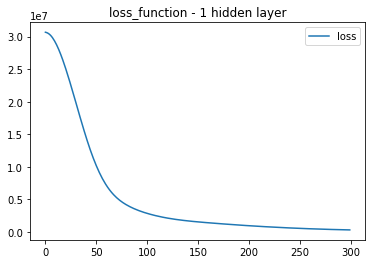

In [68]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [69]:
# Define the model - deep neural net
number_input_features = 63
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25
hidden_nodes_layer4 = 12

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Third hidden layer
nn.add(Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

# Fourth hidden layer
nn.add(Dense(units=hidden_nodes_layer4, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [70]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.15, epochs=1000)

Epoch 1/1000
44/44 [==============================] - 0s 3ms/step - loss: 38005296.0000 - mse: 38005296.0000 - val_loss: 70630712.0000 - val_mse: 70630712.0000
Epoch 2/1000
44/44 [==============================] - 0s 1ms/step - loss: 38003612.0000 - mse: 38003612.0000 - val_loss: 70627040.0000 - val_mse: 70627040.0000
Epoch 3/1000
44/44 [==============================] - 0s 1ms/step - loss: 37984396.0000 - mse: 37984396.0000 - val_loss: 70476024.0000 - val_mse: 70476024.0000
Epoch 4/1000
44/44 [==============================] - 0s 1ms/step - loss: 36227928.0000 - mse: 36227928.0000 - val_loss: 64025316.0000 - val_mse: 64025316.0000
Epoch 5/1000
44/44 [==============================] - 0s 1ms/step - loss: 17417764.0000 - mse: 17417764.0000 - val_loss: 35355516.0000 - val_mse: 35355516.0000
Epoch 6/1000
44/44 [==============================] - 0s 1ms/step - loss: 4469999.5000 - mse: 4469999.5000 - val_loss: 34198964.0000 - val_mse: 34198964.0000
Epoch 7/1000
44/44 [======================

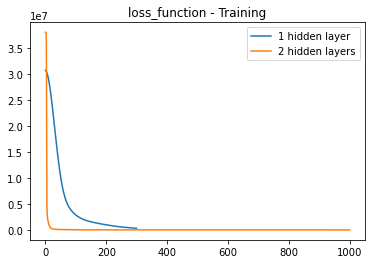

In [71]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

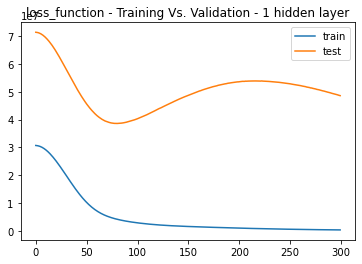

In [72]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

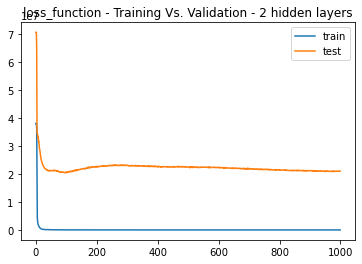

In [73]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()